Found 2004 images belonging to 2 classes.


Found 1000 images belonging to 2 classes.
[1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 1. 

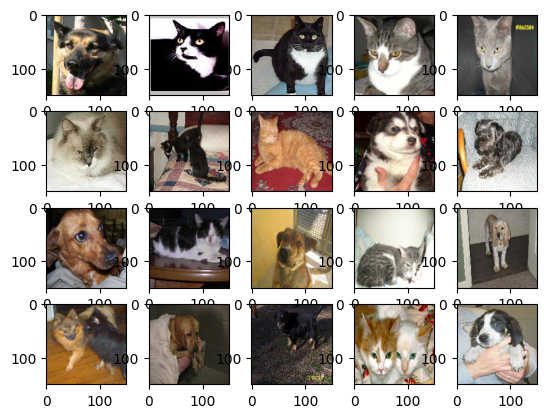

In [21]:
#ImageDataGenerator 이용

from tensorflow.keras.preprocessing.image import ImageDataGenerator # keras 안에 numpy 있음
import matplotlib.pyplot as plt

#경로 설정
train_dir = 'D:/M.L/cat_dog_small/train'
validation_dir = 'D:/M.L/cat_dog_small/validation'

#생성
train_datagen = ImageDataGenerator(rescale = 1/255) #0 ~ 1까지 정규화# DataImageGenerator은 사진은 일정한 크기고 조정해주는 역할도 함.
validation_datagen = ImageDataGenerator(rescale = 1/255)

#설정
train_generator = train_datagen.flow_from_directory(
    train_dir,
    classes = ['cats', 'dogs'], # 타켓, 레이블
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    classes = ['cats', 'dogs'], # 타켓, 레이블
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)
# generator 동작확인

#한 번에 20개 이미지를 가져와서 화면에 출력하기
fig = plt.figure()
axs = []

for i in range(20):
    axs.append(fig.add_subplot(4, 5, i+1))

for data_batch, label_batch in train_generator:
    #print(data.shape)
    #print(label.shape)

    for idx, img_data in enumerate(data_batch):#가져온 값을 순서대로 반환하기 위해 enumerate 사용
        axs[idx].imshow(img_data)
        
        #print(label_batch.shape)
        print(label_batch)
    break


In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential #model, box
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

#1. model 생성
model = Sequential()

#2. 모델에 layer 추가

###1
model.add(Conv2D(
    filters = 32,
    kernel_size = (3, 3),
    strides = (1, 1),
    padding = 'VALID',
    activation = 'relu',
    input_shape = (150, 150, 3)
))
model.add(MaxPooling2D(
    pool_size = (2, 2)
))

###2
model.add(Conv2D(
    filters = 64,
    kernel_size = (3, 3),
    strides = (1, 1),
    padding = 'VALID',
    activation = 'relu',
))
model.add(MaxPooling2D(
    pool_size = (2, 2)
))
###3
model.add(Conv2D(
    filters = 256,
    kernel_size = (3, 3),
    strides = (1, 1),
    padding = 'VALID',
    activation = 'relu',
))
model.add(MaxPooling2D(
    pool_size = (2, 2)
))
###4
model.add(Conv2D(
    filters = 512,
    kernel_size = (3, 3),
    strides = (1, 1),
    padding = 'VALID',
    activation = 'relu',
))
model.add(MaxPooling2D(
    pool_size = (2, 2)
))
######################################################################
model.add(Flatten())
model.add(Dense(
    units = 1,
    activation = 'sigmoid',

))

model.summary()

model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss = 'binary_crossentropy', 
    metrics = ['acc']
)

model.fit(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50,
    verbose = 1 # 화면 중간중간 메시지를 보냄
)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_35 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_36 (Conv2D)          (None, 34, 34, 256)       147712    
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 17, 17, 256)     